## Linear Regression Lab
### Pre-lab
In reality, before applying a machine learning algorithm, you would need to:
1. Find a dataset
2. Modify the dataset as per your needs
3. Preprocess the dataset for improved performance (normalize, reduce dimensions, etc.)
For now, the first two steps have already been done for you, and the third step will be discussed in the next article.

To import the data and any necessary libraries, simply run the cell below.

In [248]:
# Deal with large arrays quickly and easily
import numpy as np
# Display data table
import pandas as pd

# Get data from CSV file
with open("Fish Dataset.csv") as f:
    titlesRaw, dataRaw = f.read().split("\n", 1)
    titles = titlesRaw.split(",")
    data = np.array([i.split(",") for i in dataRaw.split("\n")]).astype(float)
del titlesRaw, dataRaw, f

# Create data table
dataTable = pd.DataFrame(data, columns=titles)

# Display data table
dataTable

,Vertical Length (cm),Diagonal Length (cm),Cross Length (cm),Height (cm),Diagonal Width (cm),Weight (g)
0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,24.0,26.3,31.2,12.4800,4.3056,290.0
2,23.9,26.5,31.1,12.3778,4.6961,340.0
3,26.3,29.0,33.5,12.7300,4.4555,363.0
4,26.5,29.0,34.0,12.4440,5.1340,430.0
...,...,...,...,...,...,...
137,11.5,12.2,13.4,2.0904,1.3936,12.2
138,11.7,12.4,13.5,2.4300,1.2690,13.4
139,12.1,13.0,13.8,2.2770,1.2558,12.2
140,13.2,14.3,15.2,2.8728,2.0672,19.7


After running the cell above, you should be able to see a data table about fish. Your goal is to take the fish species, vertical length, diagonal length, cross length, height, and diagonal width, and use that to predict the fish's weight. First, let's perform a basic visualization of the data to see what kind of model would work well.

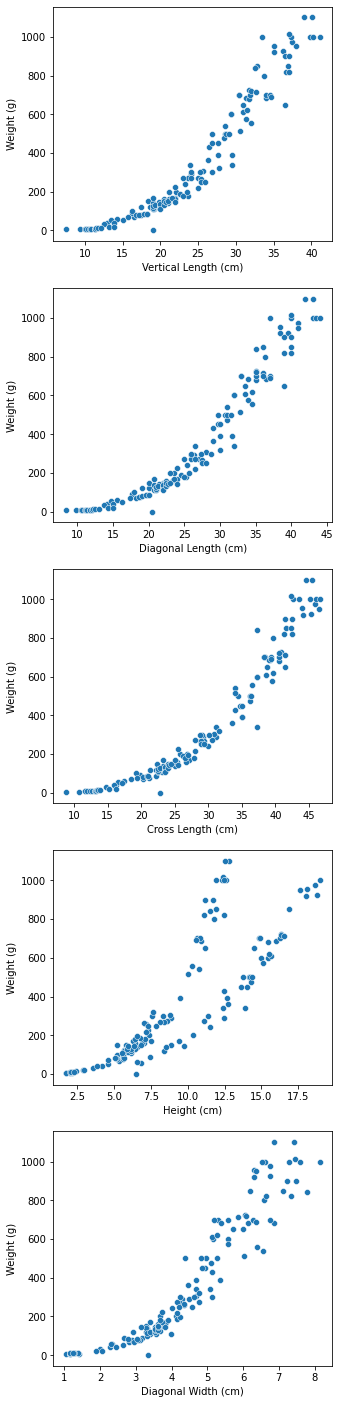

In [249]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(5, 1, figsize=(5, 25))

sns.scatterplot(ax=axes[0], data=dataTable, x="Vertical Length (cm)", y="Weight (g)")
sns.scatterplot(ax=axes[1], data=dataTable, x="Diagonal Length (cm)", y="Weight (g)")
sns.scatterplot(ax=axes[2], data=dataTable, x="Cross Length (cm)", y="Weight (g)")
sns.scatterplot(ax=axes[3], data=dataTable, x="Height (cm)", y="Weight (g)")
sns.scatterplot(ax=axes[4], data=dataTable, x="Diagonal Width (cm)", y="Weight (g)")

del fig, axes

Above, we have analyzed the direct relationships between our inputs and outputs. Note that the relations could be multivariable, but the dataset has been chosen so it is not, as the purpose of this exercise is to learn the inner computational mechanics of linear regression, not how to apply it.

It seems like each of the parameters would benefit from a fit with a squared term. So, let's add that into our linear regression equation.

$$f(\theta, x_i)=\theta_1 x_{i,\, \text{vertical\_length}} + \theta_2 x_{i,\, \text{vertical\_length}}^2$$  
$$+ \theta_3 x_{i,\, \text{diagonal\_length}} + \theta_4 x_{i,\, \text{diagonal\_length}}^2$$  
$$+ \theta_5 x_{i,\, \text{cross\_length}} + \theta_6 x_{i,\, \text{cross\_length}}^2$$  
$$+ \theta_7 x_{i,\, \text{height}} + \theta_8 x_{i,\, \text{height}}^2$$  
$$+ \theta_9 x_{i,\, \text{diagonal\_width}} + \theta_{10} x_{i,\, \text{diagonal\_width}}^2$$  
$$+ \theta_{11}$$

Note that we will preprocess the squared terms and store them in an array to reduce the computation necessary in the next cell. In addition, we will be also splitting the data into training and validation groups.

In [250]:
# Shuffle data to make it unordered and random
np.random.shuffle(data)

trainingData = data[:71, :]
validationData = data[71:, :]

x_vertical_length, x_diagonal_length, x_cross_length, x_height, x_diagonal_width, trainingOutputs = np.hsplit(trainingData, 6)
trainingData = np.hstack((
    x_vertical_length, x_vertical_length**2,
    x_diagonal_length, x_diagonal_length**2,
    x_cross_length, x_cross_length**2,
    x_height, x_height**2,
    x_diagonal_width, x_diagonal_width**2
))

x_vertical_length, x_diagonal_length, x_cross_length, x_height, x_diagonal_width, validationOutputs = np.hsplit(validationData, 6)
validationData = np.hstack((
    x_vertical_length, x_vertical_length**2,
    x_diagonal_length, x_diagonal_length**2,
    x_cross_length, x_cross_length**2,
    x_height, x_height**2,
    x_diagonal_width, x_diagonal_width**2
))

del x_vertical_length, x_diagonal_length, x_cross_length, x_height, x_diagonal_width

print("Data split successfully.")

Data split successfully.


After that, this lab contains various checks to make sure that you've implemented the methods correctly. Run the next cell to initialize them.

In [270]:
def checkF():
    check1 = f(np.array([1,2,3,4,5,6,7,8,9,10,11]).T, np.array([1,2,3,4,5,6,7,8,9,10]).T) == 396
    check2 = f(np.array([1,2,3,4,5,6,7,8,9,10,11]).T, np.array([10,9,8,7,6,5,4,3,2,1]).T) == 231

    if check1 and check2:
        print("Successful implementation of function!")
    else:
        print("Oops! There's an error in your code.")

def checkJ():
    global trainingData, trainingOutputs

    temp1 = trainingData
    temp2 = trainingOutputs

    trainingData = np.array([[3, 5, 2, 5, 7, 3, 5, 7, 9, 1], [7, 2, 7, 9, 12, 3, -2, 9, 1, 100]])
    trainingOutputs = np.array([[71], [23]])

    check1 = 2784 < J(np.array([0,0,0,0,0,0,0,0,0,0,0])) < 2786
    check2 = 8201 < J(np.array([1,1,1,1,1,1,1,1,1,1,1])) < 8203

    trainingData = temp1
    trainingOutputs = temp2

    if check1 and check2:
        print("Successful implementation of function!")
    else:
        print("Oops! There's an error in your code.")

def checkGradients():
    global trainingData, trainingOutputs

    temp1 = trainingData
    temp2 = trainingOutputs

    trainingData = np.array([[3, 5, 2, 5, 7, 3, 5, 7, 9, 1], [7, 2, 7, 9, 12, 3, -2, 9, 1, 100]])
    trainingOutputs = np.array([[71], [23]])

    check1 = getGradients(np.array([0,0,0,0,0,0,0,0,0,0,0]))
    check2 = getGradients(np.array([1,1,1,1,1,1,1,1,1,1,1]))

    expectedCheck1 = [-374.0, -401.0, -303.0, -562.0, -773.0, -282.0, -309.0, -704.0, -662.0, -2371.0, -94.0]
    expectedCheck2 = [813.0, 137.0, 836.0, 1019.0, 1351.0, 309.0, -367.0, 973.0, -81.0, 12577.0, 103.0]

    correct = True
    for i in range(11):
        correct = correct and expectedCheck1[i]-1.5 < check1[i] < expectedCheck1[i]+1.5 and expectedCheck2[i]-1.5 < check2[i] < expectedCheck2[i]+1.5

    trainingData = temp1
    trainingOutputs = temp2

    if correct:
        print("Successful implementation of function!")
    else:
        print("Oops! There's an error in your code.")


Great! Now you have everything you need to make your linear regression model. Specifically, you have to use these to train your model:
* `trainingData` - data which has all the training input data, with the columns in this order:
  * $\text{Vertical Length}$
  * $\text{Diagonal Length}^2$
  * $\text{Diagonal Length}$
  * $\text{Diagonal Length}^2$
  * $\text{Cross Length}$
  * $\text{Cross Length}^2$
  * $\text{Height}$
  * $\text{Height}^2$
  * $\text{Diagonal Width}$
  * $\text{Diagonal Width}^2$
* `validationData` - data which has all the validation input data in the same column layout as above
* `trainingOutputs` - a column of the expected outputs for the corresponding training data
* `validaitonOutputs` - a column of the expected outputs for the corresponding validation data

But wait, one more thing before you start the hands-on portion:
### Quick Tutorial

How the heck do you process all of this data without descending into `for` loop hell? Well, `numpy` is a python library that's used to process large amounts of data in an easy manner. One of its advantages is that you don't need to write a loop to process each row of data. You'll need to use the following functions for this lab:
* `np.array` - converts a native python array to a numpy array
* `np_array[a:b, c:d]` - gets elements from row a (inclusive) to b (exclusive), and then column c (inclusive) to d (exclusive). This is very similar to accessing elements in a python list, but now you can access more than one dimension at once.
* `np_array + np_array` - adds the two arrays element-wise. For example, `[1, 2] + [3, 4] = [4, 6]`.
* `np_array - np_array` - subtracts the two arrays element-wise. For example, `[1, 2] - [3, 4] = [-2, -2]`.
* `np_array * np_array` - multiplies the two arrays element-wise. For example, `[1, 2] * [3, 4] = [3, 8]`.

Instead of math.pow, you can use `**` as its equivalent. **MAKE SURE** that you don't use `^`, as that is a bitwise OR operator, not a math exponent. If you don't know what that is, don't worry about it, just remember to not use it.  
Example: `3**4` returns `81`.


### Hands-On Section
First, implement the $f(\theta, x_i)$ function. Remember that $x_i$ contains 10 values in the format of a row, and $\theta$ contains 11 values in the format of a row.

Running the cell will automatically tell you whether your implementation is correct or not.

In [252]:
def f(thetas, xs):
    # Type your code here
    return sum(thetas[i]*xs[i] for i in range(10))+ thetas[10]

checkF()

Successful implementation of function!


<details>
<summary>Stuck or completed? Click here to reveal a working example function that you could've written.</summary>

```py
def f(thetas, xs):
    # Multiply corresponding thetas to xs and add them together
    result = 0
    for i in range(10):
        result += thetas[i]*xs[i]
    
    # Add the last theta and return result
    return result + thetas[10]
```
</details>

You've implemented your function. Great job! Now, you have to implement the cost function. We will graph this over iterations to ensure that we're making progress.
$$J(θ) = \frac{1}{n} \sum_{i=1}^n (f(θ, x_i) - y_i)^2$$

In [253]:
def J(thetas):
    # Type your code here
    result = 0
    for i in range(len(trainingData)):
        result += (f(thetas, trainingData[i]) - trainingOutputs[i, 0])**2
    return result/len(trainingData)

checkJ()

Successful implementation of function!


<details>
<summary>Stuck or completed? Click here to reveal a working example function that you could've written.</summary>

```py
def J(thetas):
    # Loop through each row, adding results together
    result = 0
    for i in range(len(trainingData)):
        # Two arrays go into f, number returned
        # Subtract prediction and expected output, square, and add to result
        result += (f(thetas, trainingData[i]) - trainingOutputs[i, 0])**2
    # Take the average and return
    return result/len(trainingData)
```
</details>

Next, it's time to implement the gradients. If you don't know how to take the gradient of the regression equation, then click below to view them.

<details>
<summary>View Gradients</summary>
<details>
<summary>

$\frac{\partial}{\partial \theta_1} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{vertical\_length}})$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_2} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{vertical\_length}}^2)$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_3} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{diagonal\_length}})$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_4} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{diagonal\_length}}^2)$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_5} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{cross\_length}})$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_6} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{cross\_length}}^2)$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_7} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{height}})$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_8} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{height}}^2)$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_9} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{diagonal\_width}})$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_{10}} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n ((f(θ, x_i) - y_i) * x_{i,\, \text{diagonal\_width}}^2)$$
</details>

<details>
<summary>

$\frac{\partial}{\partial \theta_{11}} J(\theta)$</summary>
$$\frac{2}{n} \sum_{i=1}^n (f(θ, x_i) - y_i)$$
</details>
</details>

<details>
<summary>Implementation Hint</summary>

Try to use the fact that all the partial derivatives have $f(θ, x_i) - y_i$ and $\frac{2}{n}$ in common to "parallel process" these.
</details>

In [271]:
def getGradients(thetas):
    # Type your code here
    n = len(trainingData)
    results = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    for i in range(n):
        resultPart = f(thetas, trainingData[i]) - trainingOutputs[i, 0]
        for j in range(10):
            results[j] += resultPart * trainingData[i, j]
        results[10] += resultPart
    
    for i in range(11):
        results[i] = 2 * results[i] / n

    return results

checkGradients()

Successful implementation of function!


### Credits
* This lab used a modified version of Aung Pyae's fish market dataset from Kaggle. You can find the original dataset [here](https://www.kaggle.com/datasets/aungpyaeap/fish-market).